In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/amine/OneDrive/Desktop/pfa/Android_Permission.csv")

In [4]:
df = pd.read_csv("C:/Users/amine/OneDrive/Desktop/pfa/Android_Permission.csv")

In [5]:
df = pd.read_csv("C:/Users/amine/OneDrive/Desktop/pfa/Android_Permission.csv")

In [6]:
print(df.head())  # First 5 rows
print(df.info())  # Column details and data types
print(df.describe())  # Summary statistics for numerical columns

                              App                                   Package  \
0         Canada Post Corporation                    com.canadapost.android   
1                       Word Farm                 com.realcasualgames.words   
2            Fortunes of War FREE                        fortunesofwar.free   
3  Better Keyboard: Avatar Purple  com.cc.betterkeyboard.skins.avatarpurple   
4                      Boxing Day                indiaNIC.android.BoxingDay   

           Category                                        Description  \
0          Business  Canada Post Mobile App gives you access to som...   
1    Brain & Puzzle  Speed and strategy combine in this exciting wo...   
2    Cards & Casino  Fortunes of War is a fast-paced, easy to learn...   
3  Libraries & Demo  Skin for Better Keyboard featuring a glossy fe...   
4         Lifestyle  Boxing Day by Christopher Jaymes<p>Based on a ...   

   Rating  Number of ratings  Price  \
0     3.1                 77   0.00   
1 

In [7]:
print(df.isnull().sum())  # Check for missing values
df = df.dropna()  # Drop rows with missing values (if appropriate)


App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64


In [8]:
# plt.hist(df['numeric_column'], bins=20, color='blue', edgecolor='black')
# plt.title('Histogram of Numeric Column')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

In [9]:
print(df.columns)

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)


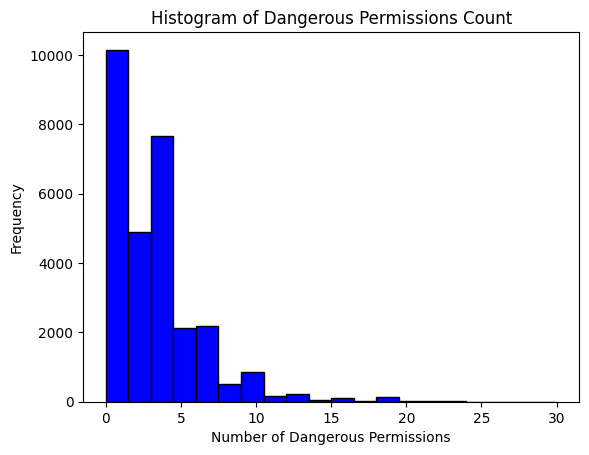

In [10]:
plt.hist(df['Dangerous permissions count'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Dangerous Permissions Count')
plt.xlabel('Number of Dangerous Permissions')
plt.ylabel('Frequency')
plt.show()

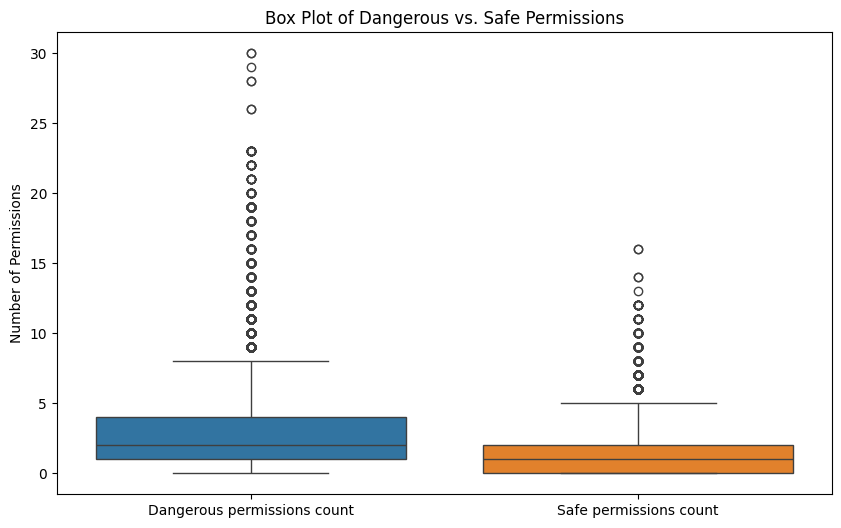

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Dangerous permissions count', 'Safe permissions count']])
plt.title('Box Plot of Dangerous vs. Safe Permissions')
plt.ylabel('Number of Permissions')
plt.show()

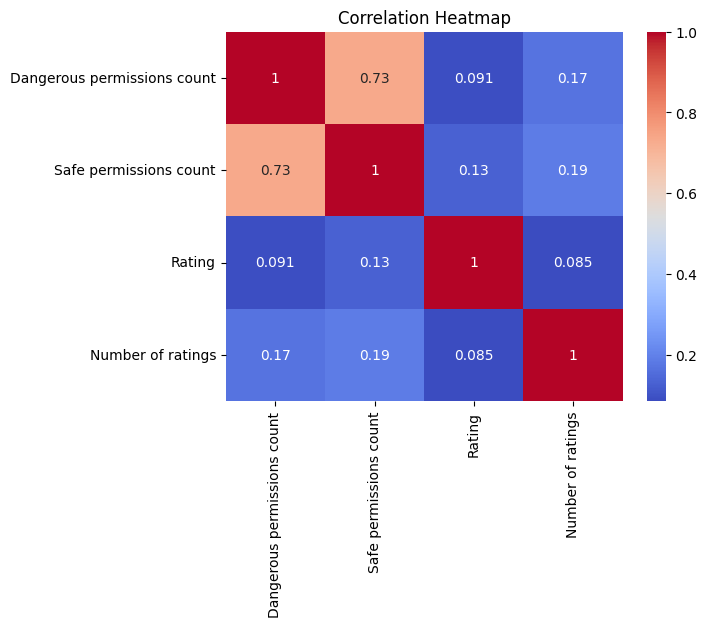

In [12]:
# Correlation heatmap
correlation_matrix = df[['Dangerous permissions count', 'Safe permissions count', 'Rating', 'Number of ratings']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

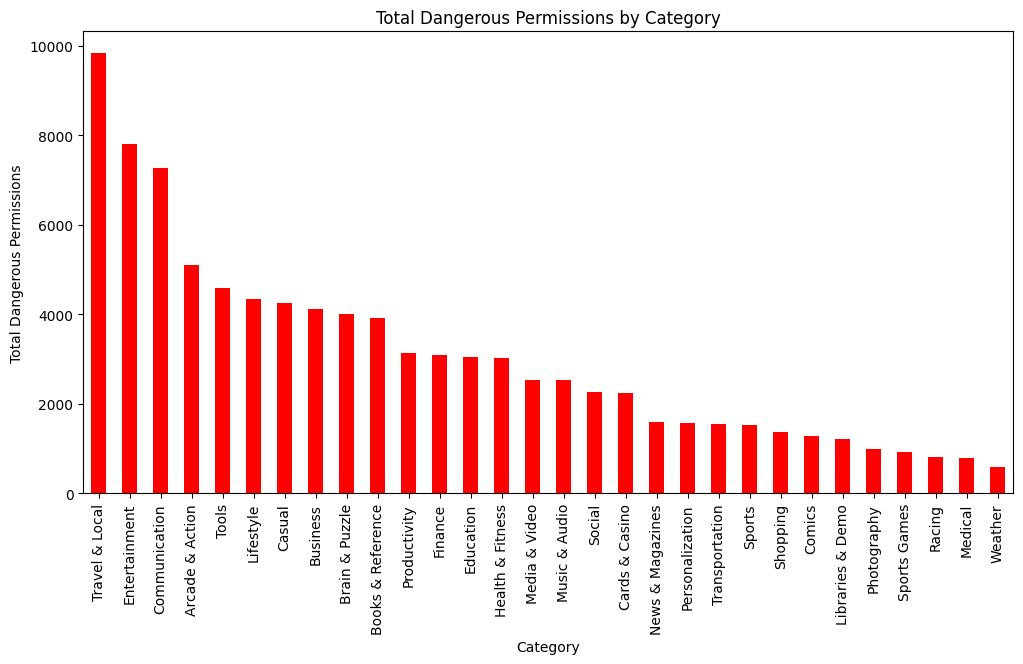

In [13]:
category_dangerous = df.groupby('Category')['Dangerous permissions count'].sum().sort_values(ascending=False)

# Bar plot for Dangerous Permissions by Category
plt.figure(figsize=(12, 6))
category_dangerous.plot(kind='bar', color='red')
plt.title('Total Dangerous Permissions by Category')
plt.xlabel('Category')
plt.ylabel('Total Dangerous Permissions')
plt.xticks(rotation=90)
plt.show()

In [14]:
dangerous_permissions = [col for col in df.columns if col.endswith('(D)')]
print(dangerous_permissions)

['Development tools : enable application debugging (D)', 'Development tools : limit number of running processes (D)', 'Development tools : make all background applications close (D)', 'Development tools : send Linux signals to applications (D)', 'Hardware controls : change your audio settings (D)', 'Hardware controls : record audio (D)', 'Hardware controls : take pictures and videos (D)', 'Network communication : control Near Field Communication (D)', 'Network communication : create Bluetooth connections (D)', 'Network communication : full Internet access (D)', 'Network communication : make/receive Internet calls (D)', 'Phone calls : intercept outgoing calls (D)', 'Phone calls : read phone state and identity (D)', 'Services that cost you money : directly call phone numbers (D)', 'Services that cost you money : send SMS messages (D)', 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)', 'System tools : allow Wi-Fi Multicast reception (D)', 'System tools : b

In [15]:
permission_counts = df[dangerous_permissions].sum().sort_values(ascending=False)
print(permission_counts)

Network communication : full Internet access (D)                                   24011
Storage : modify/delete USB storage contents modify/delete SD card contents (D)    11698
Phone calls : read phone state and identity (D)                                    10951
Your location : fine (GPS) location (D)                                             6375
Your location : coarse (network-based) location (D)                                 6261
                                                                                   ...  
Development tools : make all background applications close (D)                         3
Development tools : limit number of running processes (D)                              2
Your accounts : Blogger (D)                                                            0
Your messages : write instant messages (D)                                             0
Your messages : read Gmail attachment previews (D)                                     0
Length: 74, dtype: in

In [16]:
# Calculate the percentage of each dangerous permission
total_apps = len(df)
permission_percentages = (permission_counts / total_apps) * 100
print(permission_percentages)

Network communication : full Internet access (D)                                   82.116963
Storage : modify/delete USB storage contents modify/delete SD card contents (D)    40.006840
Phone calls : read phone state and identity (D)                                    37.452120
Your location : fine (GPS) location (D)                                            21.802326
Your location : coarse (network-based) location (D)                                21.412449
                                                                                     ...    
Development tools : make all background applications close (D)                      0.010260
Development tools : limit number of running processes (D)                           0.006840
Your accounts : Blogger (D)                                                         0.000000
Your messages : write instant messages (D)                                          0.000000
Your messages : read Gmail attachment previews (D)                    

C:\Users\amine\AppData\Local\Temp\ipykernel_12144\3073875613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=permission_percentages.values, y=permission_percentages.index, palette='viridis')


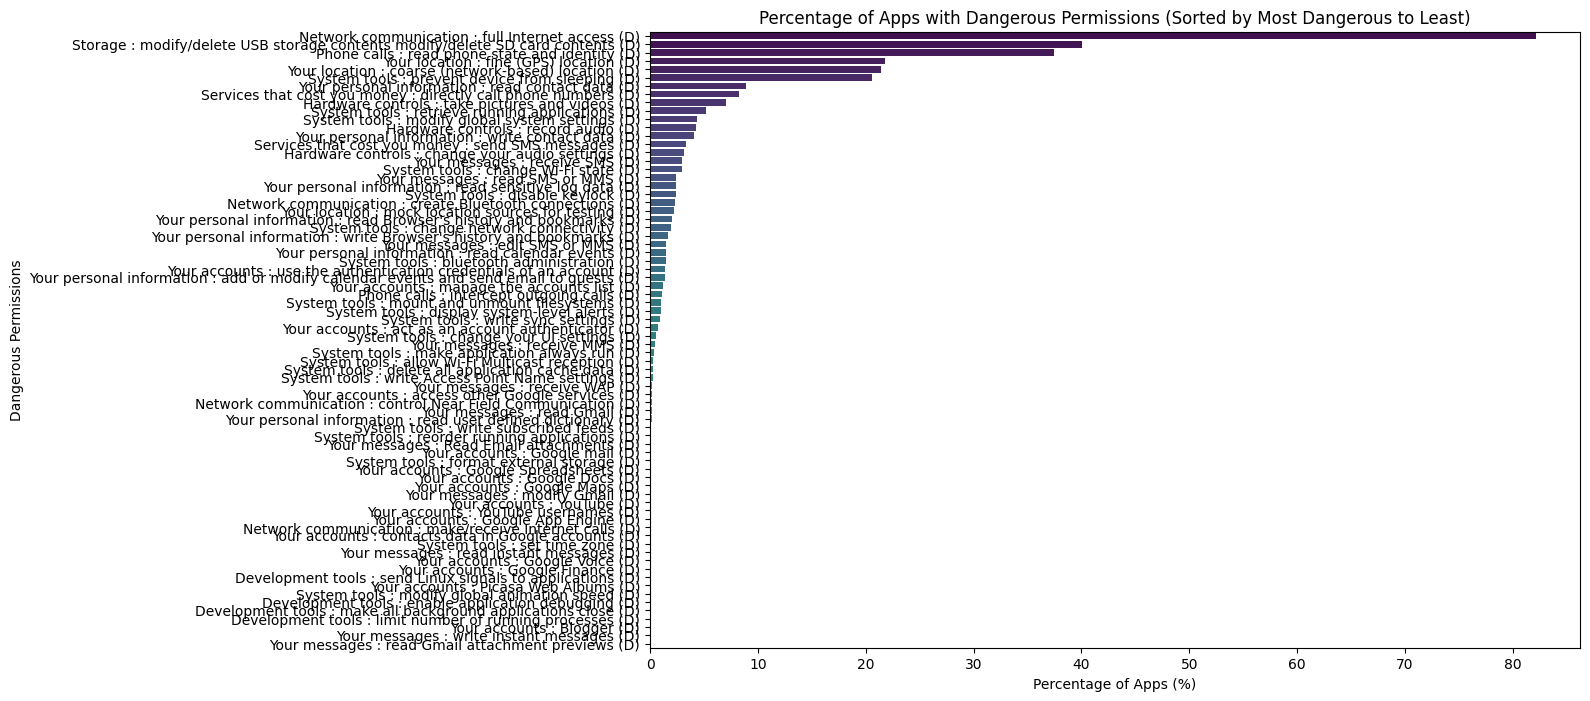

In [17]:
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x=permission_percentages.values, y=permission_percentages.index, palette='viridis')

# Add labels and title
plt.xlabel('Percentage of Apps (%)')
plt.ylabel('Dangerous Permissions')
plt.title('Percentage of Apps with Dangerous Permissions (Sorted by Most Dangerous to Least)')

# Show the plot
plt.show()

In [18]:
import pandas as pd

# Use the absolute path (macOS format)
df = pd.read_csv("C:/Users/amine/OneDrive/Desktop/pfa/Android_Permission.csv")

# Check the first 5 rows
print(df.head())

                              App                                   Package  \
0         Canada Post Corporation                    com.canadapost.android   
1                       Word Farm                 com.realcasualgames.words   
2            Fortunes of War FREE                        fortunesofwar.free   
3  Better Keyboard: Avatar Purple  com.cc.betterkeyboard.skins.avatarpurple   
4                      Boxing Day                indiaNIC.android.BoxingDay   

           Category                                        Description  \
0          Business  Canada Post Mobile App gives you access to som...   
1    Brain & Puzzle  Speed and strategy combine in this exciting wo...   
2    Cards & Casino  Fortunes of War is a fast-paced, easy to learn...   
3  Libraries & Demo  Skin for Better Keyboard featuring a glossy fe...   
4         Lifestyle  Boxing Day by Christopher Jaymes<p>Based on a ...   

   Rating  Number of ratings  Price  \
0     3.1                 77   0.00   
1 

In [19]:
dangerous_permissions = [col for col in df.columns if col.endswith('(D)')]

In [20]:
# Creating a target variable based on a threshold
threshold = 5  # Apps with more than 5 dangerous permissions are threats
df['Class'] = df[dangerous_permissions].sum(axis=1).apply(lambda x: 'Threat' if x > threshold else 'Benign')
df['Class'] = df['Class'].map({'Benign': 0, 'Threat': 1})

In [21]:
X = df[dangerous_permissions]  # Features (dangerous permissions)
y = df['Class']  # Target variable

In [22]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      0.99      1.00       873

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5127
           1       1.00      0.95      0.97       873

    accuracy                           0.99      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.99      0.99      0.99      6000



In [25]:
from xgboost import XGBClassifier

# Train the model
model = XGBClassifier(random_state=42) 
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9968333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      0.98      0.99       873

    accuracy                           1.00      6000
   macro avg       1.00      0.99      0.99      6000
weighted avg       1.00      1.00      1.00      6000



In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5125    2]
 [  17  856]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      0.98      0.99       873

    accuracy                           1.00      6000
   macro avg       1.00      0.99      0.99      6000
weighted avg       1.00      1.00      1.00      6000



In [27]:
# Get probabilities
y_proba = model.predict_proba(X_test)

# Convert to percentage
y_proba_percent = y_proba * 100

# Display probabilities for the first 5 apps
for i in range(5):
    print(f"App {i+1}: Threat = {y_proba_percent[i][1]:.2f}%, Benign = {y_proba_percent[i][0]:.2f}%")

App 1: Threat = 5.82%, Benign = 94.18%
App 2: Threat = 0.00%, Benign = 100.00%
App 3: Threat = 0.00%, Benign = 100.00%
App 4: Threat = 100.00%, Benign = 0.00%
App 5: Threat = 0.77%, Benign = 99.23%


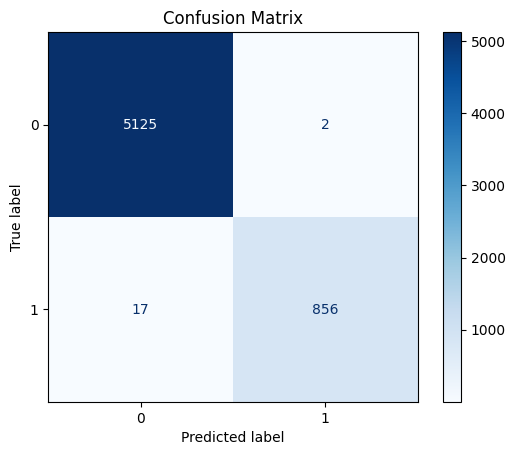

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

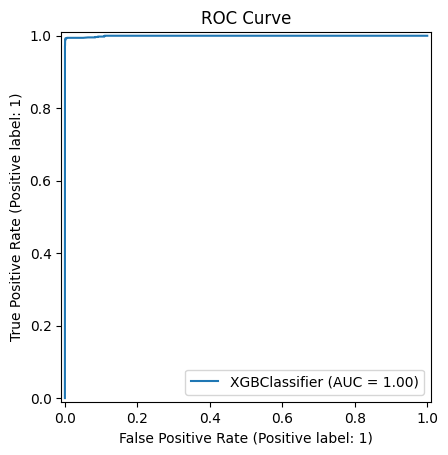

In [29]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5127
           1       1.00      0.95      0.97       873

    accuracy                           0.99      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.99      0.99      0.99      6000



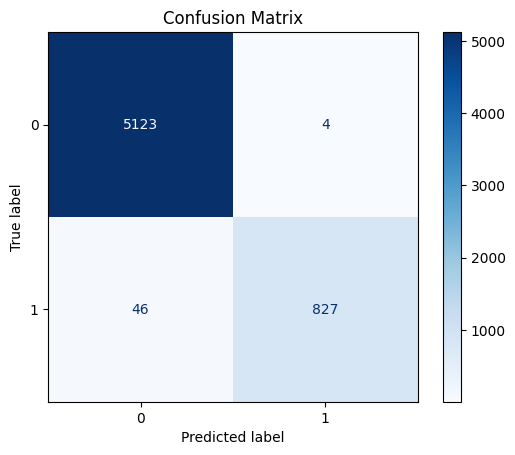

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/amine/OneDrive/Desktop/pfa/Android_Permission.csv")

# Identify dangerous permissions
dangerous_permissions = [col for col in df.columns if col.endswith('(D)')]

# Create target variable
threshold = 5
df['Class'] = df[dangerous_permissions].sum(axis=1).apply(lambda x: 'Threat' if x > threshold else 'Benign')
df['Class'] = df['Class'].map({'Benign': 0, 'Threat': 1})

# Prepare features and target
X = df[dangerous_permissions]
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from xgboost import XGBClassifier

# Train the model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9968333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      0.98      0.99       873

    accuracy                           1.00      6000
   macro avg       1.00      0.99      0.99      6000
weighted avg       1.00      1.00      1.00      6000



In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBClassifier
import joblib

# Train the model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

joblib.dump((model, dangerous_permissions), "model.pkl")

# Evaluate
y_pred = model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.9968333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      0.98      0.99       873

    accuracy                           1.00      6000
   macro avg       1.00      0.99      0.99      6000
weighted avg       1.00      1.00      1.00      6000



In [34]:
# Get probabilities
y_proba = model.predict_proba(X_test)

# Convert to percentage
y_proba_percent = y_proba * 100

# Display probabilities for the first 5 apps
for i in range(5):
    print(f"App {i+1}: Threat = {y_proba_percent[i][1]:.2f}%, Benign = {y_proba_percent[i][0]:.2f}%")

App 1: Threat = 5.82%, Benign = 94.18%
App 2: Threat = 0.00%, Benign = 100.00%
App 3: Threat = 0.00%, Benign = 100.00%
App 4: Threat = 100.00%, Benign = 0.00%
App 5: Threat = 0.77%, Benign = 99.23%
